# Animal Faces Classifications Using EfficientNetB0

In [3]:
# Importing tensorflow to check the GPU on/off
import tensorflow as tf
tf.test.gpu_device_name()

## Import Modules

In [4]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
import tensorflow as tf
from glob import glob

In [45]:
# Declaring base modules in this case EfficientNetB0
base_model = tf.keras.applications.efficientnet.EfficientNetB0(weights='imagenet', include_top=False)

## Creating Directory For Train and Tests

In [5]:
TRAIN_DIR = "../input/animal-faces/afhq/train"
TEST_DIR = '../input/animal-faces/afhq/val'

In [6]:
cats_train = "../input/animal-faces/afhq/train/cat"
dogs_train = "../input/animal-faces/afhq/train/dog"
wild_train = "../input/animal-faces/afhq/train/wild"

cats_test = "../input/animal-faces/afhq/val/cat"
dogs_test = "../input/animal-faces/afhq/val/dog"
wild_test = "../input/animal-faces/afhq/val/wild"

## Declaring base modules with the output of 3 Classess

In [9]:
CLASSES = 3 # Dividing case into 3 outputs

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
for layer in base_model.layers:
  layer.trainable = False

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Import efficientNet for Preprocessing the input

In [12]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

This is the size of imageNet from Keras

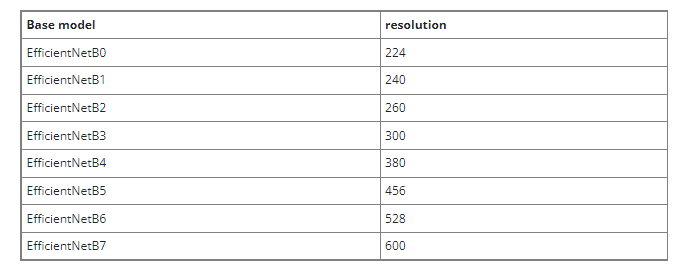

As you can see the resolutions for EfficientNetB0 is 224

In [13]:
WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 32

In [14]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

## Visualization

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [18]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12,9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
  plt.subplot(4, 8, k+1)
  plt.imshow((img + 1) / 2)
  plt.axis('off')

## Transfer Learning

In [19]:
EPOCHS = 2
BATCH_SIZE = 128
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'three_class.model'

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS
)

model.save(MODEL_FILE)

## Test the Validation Data

In [20]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

def predict(model, img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return preds[0]

img = image.load_img('../input/animal-faces/afhq/val/wild/flickr_wild_000135.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(load_model(MODEL_FILE), img)

In [21]:
img

In [22]:
preds

In [23]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

def predict(model, img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return preds[0]

img = image.load_img('../input/animal-faces/afhq/val/dog/flickr_dog_000104.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(load_model(MODEL_FILE), img)

In [24]:
img

In [25]:
preds

In [26]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

def predict(model, img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return preds[0]

img = image.load_img('../input/animal-faces/afhq/val/cat/flickr_cat_000236.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(load_model(MODEL_FILE), img)

In [27]:
img

In [28]:
preds